In [1]:
import numpy as np
import matplotlib.pylab as plt

In [10]:
data_train = np.load('../Data/RealData/all_back_train.npy')
data_test = np.load('../Data/RealData/all_back_test.npy')
signals_train, signals_test = data_train[:, :1000], data_test[:, :1000]
labels_train, labels_test = data_train[:, 1000:], data_test[:, 1000:]
data_train.shape, data_test.shape

((4672, 1006), (1655, 1006))

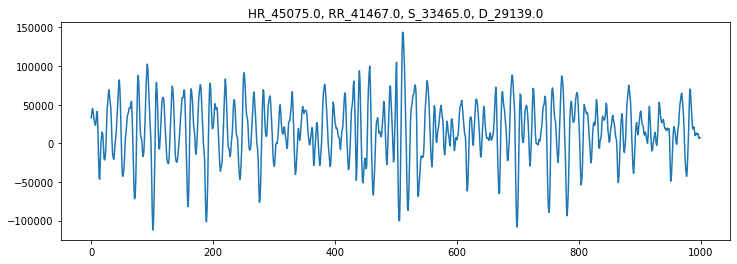

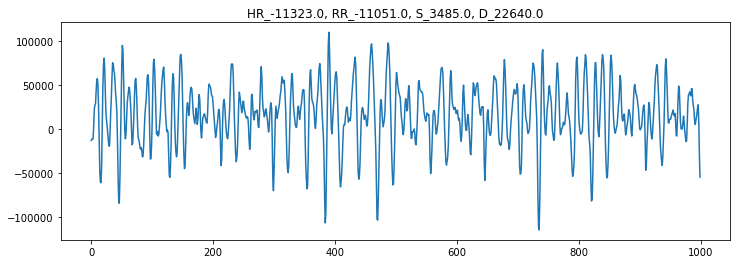

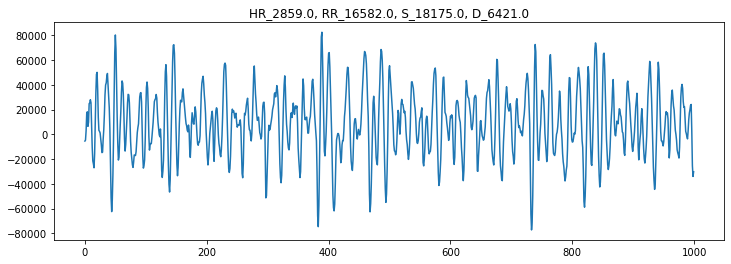

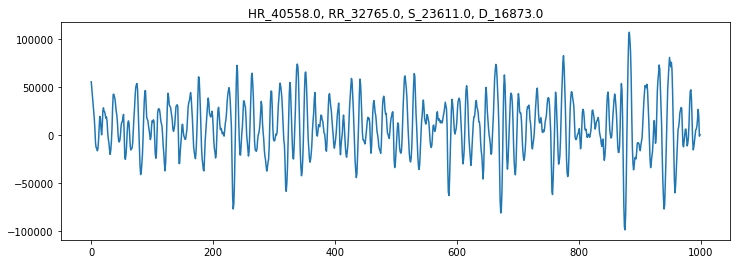

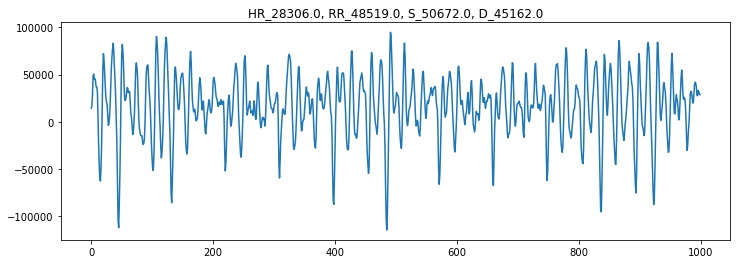

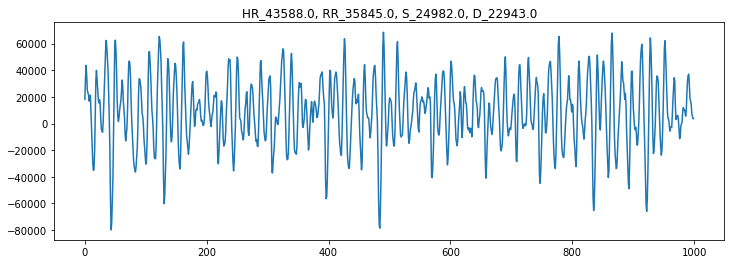

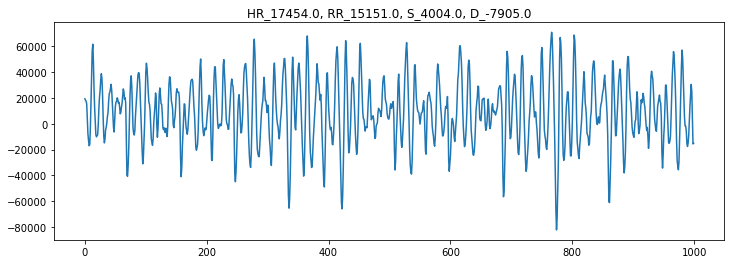

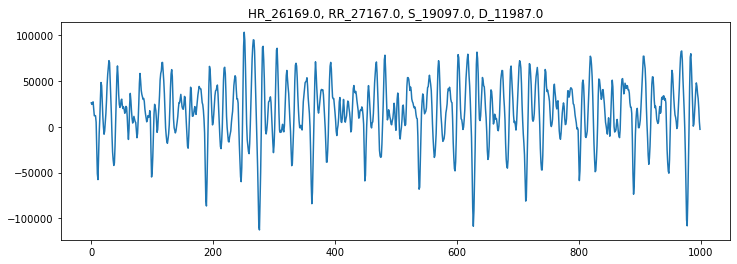

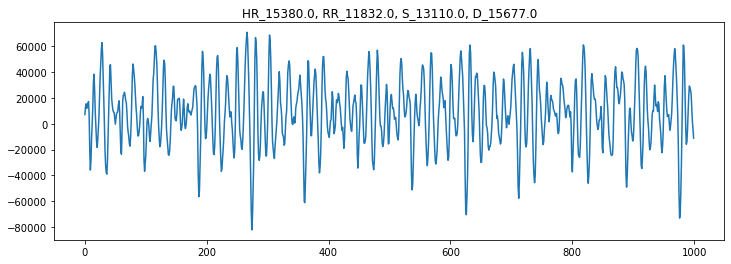

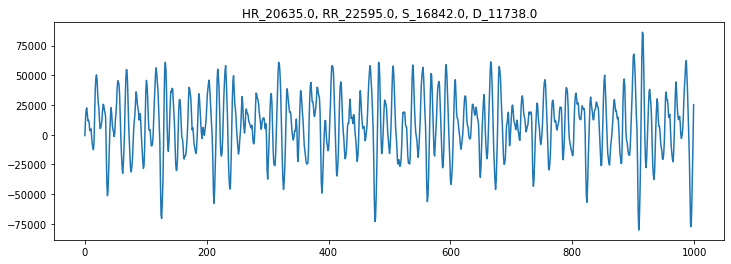

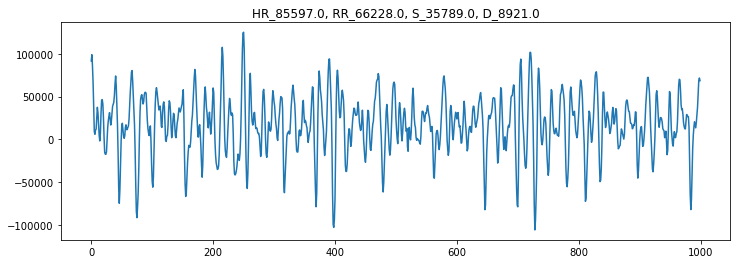

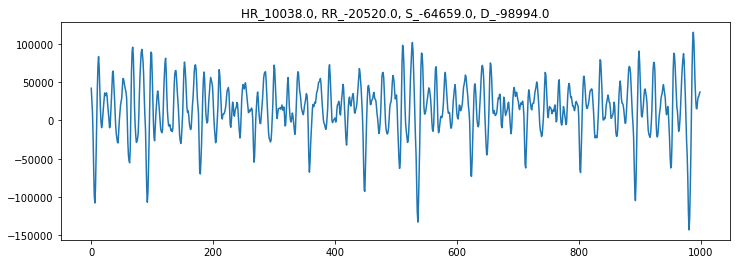

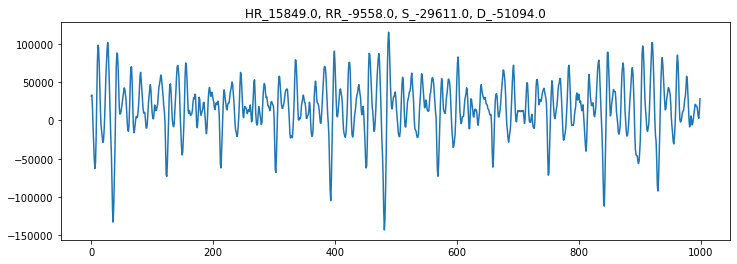

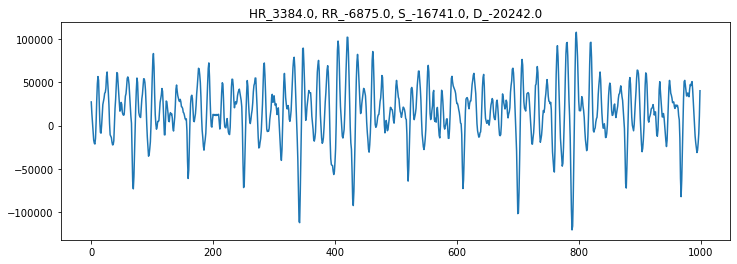

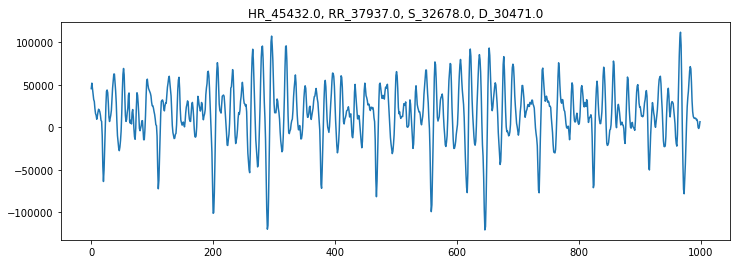

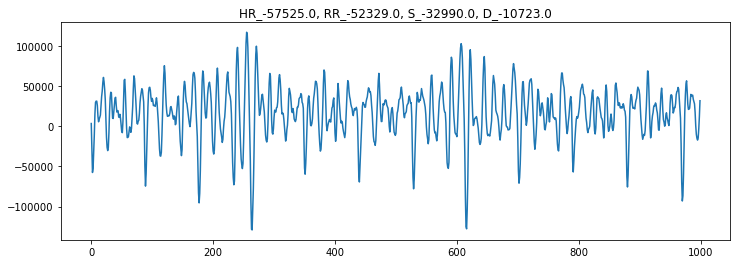

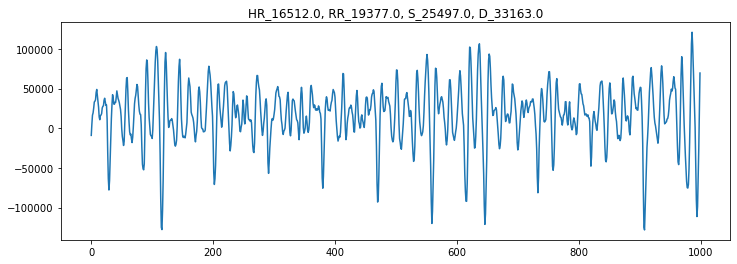

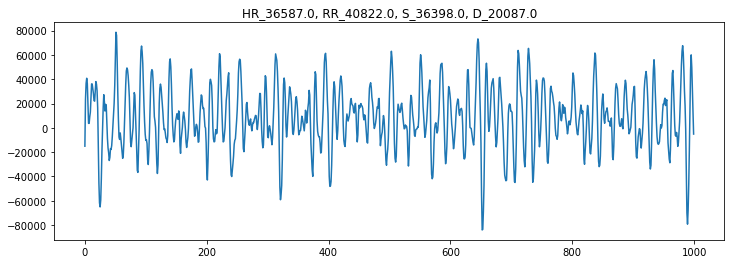

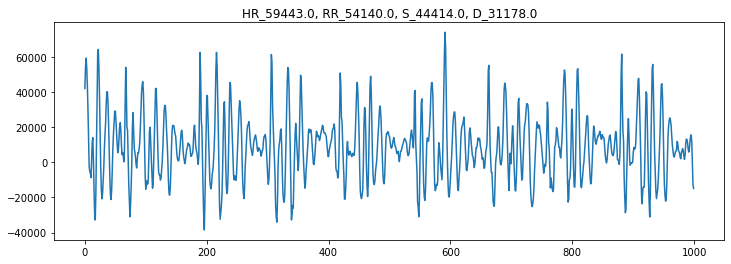

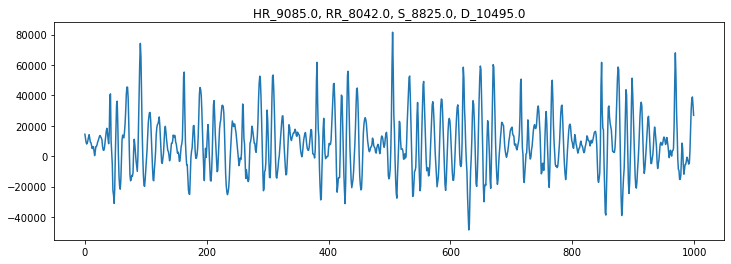

In [17]:
for i in range(20):
    plt.figure(figsize=(12, 4))
    plt.plot(signals_test[i])
    plt.title(f'HR_{signals_test[i, 2]}, RR_{signals_test[i, 3]}, S_{signals_test[i, 4]}, D_{signals_test[i, 5]}')